In [168]:
import pandas as pd
import numpy as np
import re
import datetime

data=pd.read_csv('deaar_test2.csv',delimiter=" ")
if data.columns[0]!='TIME':
    data=pd.read_csv('eclipse_test.csv',delimiter=",")
if data.columns[0]!='TIME':
    data=pd.read_csv('eclipse_test.csv',delimiter=";")
if "." in data['TIME'][0]:
    data['TIME']= data['TIME'].str.split(".",n=1,expand=True)[0]
data.replace("---",np.NaN,inplace=True)
for col in data.select_dtypes('object').columns:
    try:
        data[col]=data[col].astype(float)
    except ValueError:
        continue
data = data.round(3)
data['TIME']=data['TIME'].apply(lambda x : datetime.datetime.strptime(x, '%H:%M:%S'))
# datetime.datetime.strptime(data['TIME'], '%H:%M:%S').time()
# data['TIME']=pd.to_datetime(data['TIME'],format='%H:%M:%S').dt.time
data.to_csv("test.csv",float_format='%.3f',date_format='%H:%M:%S')

In [169]:
Active =['ppc:P[^F]','pccm.*:ACTP_TOT',"epm.*:ACTP_TOT","pccs.*:ACTP_TOT"]
P = [l for k in Active for l in data.columns if re.match(k,l)]
Reactive =['ppc:Q.*','pccm.*:REACTP_TOT',"epm.*:REACTP_TOT","pccs.*:REACTP_TOT"]
Q = [l for k in Reactive for l in data.columns if re.match(k,l)]
Voltage =['ppc:V','pccm.*:VABC_AVG',"epm.*:VABC_AVG","pccs.*:VABC_AVG"]
V = [l for k in Voltage for l in data.columns if re.match(k,l)]
Frequency=['ppc:F','pccm.*:F',"epm.*:F","pccs.*:F"]
F = [l for k in Frequency for l in data.columns if re.match(k,l)]
PowerFactor=['ppc:PF','pccm.*:PF',"epm.*:PF","pccs.*:PF"]
PF = [l for k in PowerFactor for l in data.columns if re.match(k,l)]

Active_Setpoint = ['apc:PSP']
PSP = [l for k in Active_Setpoint for l in data.columns if re.match(k,l)]
Reactive_Setpoint = ['rpc:QSP']
QSP = [l for k in Reactive_Setpoint for l in data.columns if re.match(k,l)]
QV_Setpoint = ['rpc:VSP']
QV_VSP = [l for k in QV_Setpoint for l in data.columns if re.match(k,l)]
AVR_Setpoint = ['avr:VSP']
AVR_VSP = [l for k in AVR_Setpoint for l in data.columns if re.match(k,l)]
Frequency_Setpoint = ['apc:FSP']
FSP = [l for k in Frequency_Setpoint for l in data.columns if re.match(k,l)]
PowerFactor_Setpoint = ['pfc:PFSP']
PFSP = [l for k in PowerFactor_Setpoint for l in data.columns if re.match(k,l)]

Active_En = ['apc:En']
PEn = [l for k in Active_En for l in data.columns if re.match(k,l)]
Reactive_En = ['rpc:En']
QEn = [l for k in Reactive_En for l in data.columns if re.match(k,l)]
QV_En = ['rpc:VCEn']
QVEn = [l for k in QV_En for l in data.columns if re.match(k,l)]
AVR_En = ['avr:En']
AVREn = [l for k in AVR_En for l in data.columns if re.match(k,l)]
Frequency_En = ['apc:FCEn']
FEn = [l for k in Frequency_En for l in data.columns if re.match(k,l)]
PowerFactor_En = ['pfc:En']
PFEn = [l for k in PowerFactor_En for l in data.columns if re.match(k,l)]


In [293]:
def plot_P(TIME,P,PSP,PDB):
    import matplotlib.pyplot as plt
    %matplotlib notebook
    
    fig = plt.figure(figsize=(10,5))
    plt.subplot(111)
    ax=plt.gca()
    ax.plot(TIME,P,label='P(kW)',linewidth=1)
    ax.fill_between(TIME.values,PSP-PDB,PSP+PDB,label='P Setpoint',alpha=0.5,facecolor='red')
    x = ax.xaxis
    ax.xaxis.set_major_locator(plt.MaxNLocator(25))
    ax.grid()
    ax.set_ylim(min(P.min(),PSP.min())-5*PDB,max(P.max(),PSP.max())+20*PDB)
    leg = ax.legend(loc='best')
    # rotate the tick labels for the x axis
    fig.autofmt_xdate()
    plt.show()
    return

def plot_Q(TIME,Q,QSP,QEN,QDB):
    import matplotlib.pyplot as plt
    %matplotlib notebook
    import numpy as np
    import matplotlib.dates as mdates
    from math import floor
    
    font = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 14,
        }
    
    legend_font = {'weight': 'bold',
                  'size':10}
    
    ticks_font = {'fontsize':8,
                 'fontweight':'bold'}
    
    def onpick(event):
        # on the pick event, find the orig line corresponding to the
        # legend proxy line, and toggle the visibility
        legline = event.artist
        origline = lined[legline]
        vis = not origline.get_visible()
        origline.set_visible(vis)
        # Change the alpha on the line in the legend so we can see what lines
        # have been toggled
        if vis:
            legline.set_alpha(1.0)
        else:
            legline.set_alpha(0.2)
        fig.canvas.draw()

    
    #Setpoint only when control is enabled
    QSP_copy = QSP.copy()
    QSP_copy[QEN==0]=np.NaN
    
    #Creat Figure
    fig = plt.figure(figsize=(10,5))
    plt.subplot(111)
    ax=plt.gca()
    
    #Plot Measurement
    l1,=ax.plot(TIME,Q,label='Q(kVAr)',linewidth=1.5)
    #Plot Setpoints
    l2,=ax.plot(TIME,QSP_copy,'r',label='Q Setpoint',linewidth=0.5)
    ax.fill_between(TIME.values,QSP_copy-QDB,QSP_copy+QDB,alpha=0.5,facecolor='red')
    

    #Create and plot En/Dis Events
#     ax2=ax.twinx()
#     event = abs(QEN.diff())
#     event[event==0]=np.NaN
    
#     events = TIME[event==1].tolist()
#     for e in events:
#         ax2.axvline(e,c='k')
#     ax2.yaxis.set_visible(False)
    
    #Formatting axis
    
    td = TIME.iloc[-1]-TIME.iloc[0]
    duration_min = td.seconds/60
    locator = mdates.AutoDateLocator(minticks=25,interval_multiples=True)
    locator.intervald[5]=[15]
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
    
    ax.grid()
    ax.set_ylim(min(Q.min(),QSP.min())*1.1,max(Q.max(),QSP.max())*1.1)
    leg = ax.legend(bbox_to_anchor=(0.5, 1.1),loc='upper center',ncol=2,prop=legend_font)
    fig.autofmt_xdate()
    ax.set_ylabel('Q (kVAr)',fontdict=font)
    ax.set_xlabel('TIME',fontdict=font)
    ax.tick_params(labelsize=10)
    ax.set_title('Reactive Power Control',fontdict=font,x=0.5,y=1.1)
    fig.canvas.mpl_connect('pick_event', onpick)
    plt.show()
    
    return

<IPython.core.display.Javascript object>


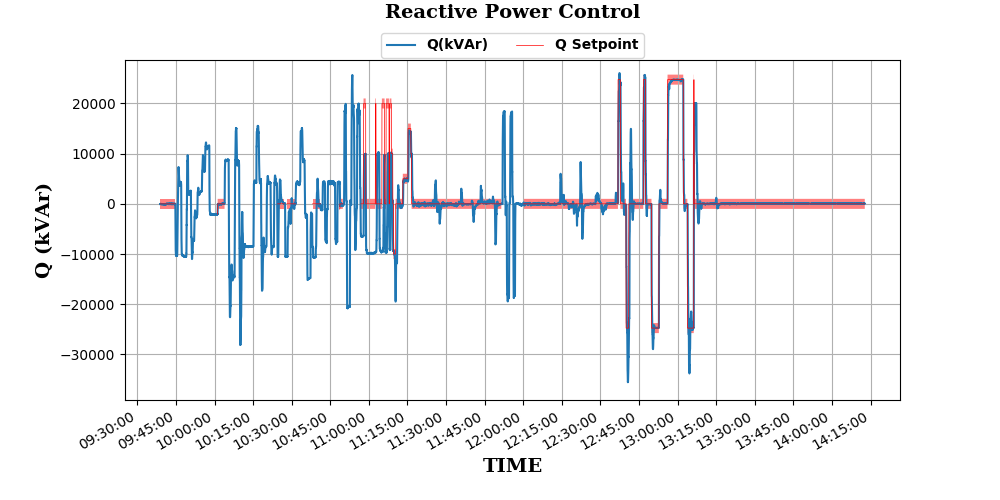

/home/spiros/.local/lib/python3.6/site-packages/ipykernel_launcher.py:93: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 15.


In [294]:
plot_Q(data['TIME'],data[Q[0]],data[QSP[0]],data[QEn[0]],1000)

<IPython.core.display.Javascript object>


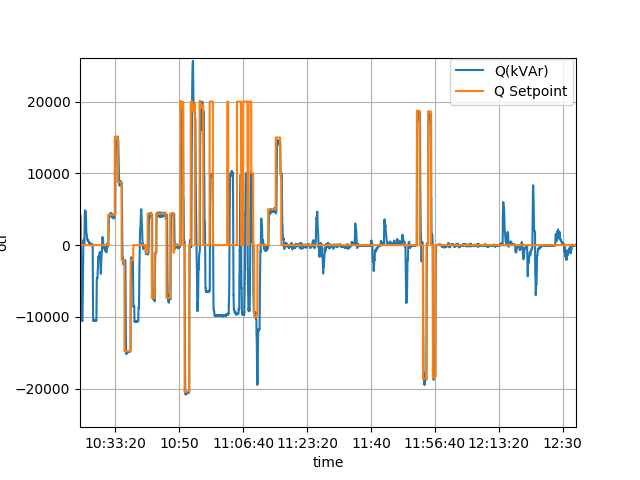

In [22]:
%matplotlib notebook
import matplotlib.pyplot as plt

fig,ax= plt.subplots()
# plt.subplot(111)
# ax=plt.gca()
l1,=ax.plot(data['TIME'],data[Q[0]],label='Q(kVAr)')
l2,=ax.plot(data['TIME'],data[QSP[0]],label='Q Setpoint')
ax.set_ylabel('oti')
ax.grid()
leg=ax.legend()
leg.set_draggable(True)
# we will set up a dict mapping legend line to orig line, and enable
# picking on the legend line
lines = [l1, l2]
lined = dict()
for legline, origline in zip(leg.get_lines(), lines):
    legline.set_picker(5)  # 5 pts tolerance
    lined[legline] = origline


def onpick(event):
    # on the pick event, find the orig line corresponding to the
    # legend proxy line, and toggle the visibility
    legline = event.artist
    origline = lined[legline]
    vis = not origline.get_visible()
    origline.set_visible(vis)
    # Change the alpha on the line in the legend so we can see what lines
    # have been toggled
    if vis:
        legline.set_alpha(1.0)
    else:
        legline.set_alpha(0.2)
    fig.canvas.draw()


fig.canvas.mpl_connect('pick_event', onpick)

plt.show()

<IPython.core.display.Javascript object>


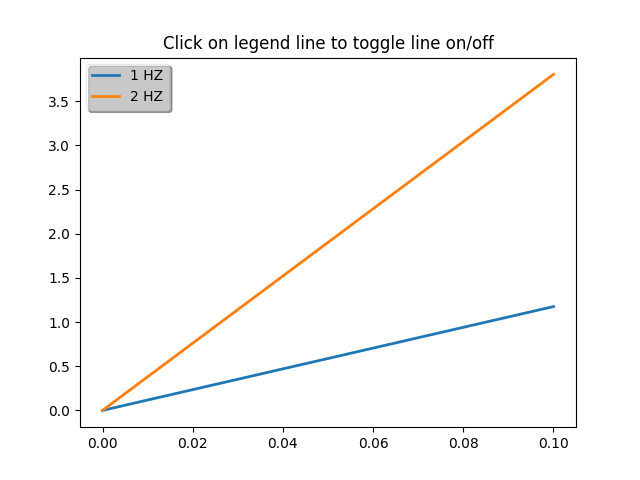

In [21]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(0.0, 0.2, 0.1)
y1 = 2*np.sin(2*np.pi*t)
y2 = 4*np.sin(2*np.pi*2*t)

fig, ax = plt.subplots()
ax.set_title('Click on legend line to toggle line on/off')
line1, = ax.plot(t, y1, lw=2, label='1 HZ')
line2, = ax.plot(t, y2, lw=2, label='2 HZ')
leg = ax.legend(loc='upper left', fancybox=True, shadow=True)
leg.get_frame().set_alpha(0.4)
leg.set_draggable(True)

# we will set up a dict mapping legend line to orig line, and enable
# picking on the legend line
lines = [line1, line2]
lined = dict()
for legline, origline in zip(leg.get_lines(), lines):
    legline.set_picker(5)  # 5 pts tolerance
    lined[legline] = origline


def onpick(event):
    # on the pick event, find the orig line corresponding to the
    # legend proxy line, and toggle the visibility
    legline = event.artist
    origline = lined[legline]
    vis = not origline.get_visible()
    origline.set_visible(vis)
    # Change the alpha on the line in the legend so we can see what lines
    # have been toggled
    if vis:
        legline.set_alpha(1.0)
    else:
        legline.set_alpha(0.2)
    fig.canvas.draw()

fig.canvas.mpl_connect('pick_event', onpick)

plt.show()

In [110]:
ax.plot_date?

In [86]:
list(ax.get_xticklabels())

[Text(37000.0, 0, '10:16:40'),
 Text(38000.0, 0, '10:33:20'),
 Text(39000.0, 0, '10:50'),
 Text(40000.0, 0, '11:06:40'),
 Text(41000.0, 0, '11:23:20'),
 Text(42000.0, 0, '11:40'),
 Text(43000.0, 0, '11:56:40'),
 Text(44000.0, 0, '12:13:20'),
 Text(45000.0, 0, '12:30'),
 Text(46000.0, 0, '12:46:40')]

In [128]:
data['TIME'][0]

datetime.time(9, 38, 53)

In [165]:
datetime.datetime.strptime?

In [201]:
import matplotlib.dates as mdates
locator = mdates.AutoDateLocator(minticks=30)

In [202]:
locator.intervald

{0: [1,
  2,
  4,
  5,
  10,
  20,
  40,
  50,
  100,
  200,
  400,
  500,
  1000,
  2000,
  4000,
  5000,
  10000],
 1: [1, 2, 3, 4, 6],
 3: [1, 2, 4, 7, 14, 21],
 4: [1, 2, 3, 4, 6, 12],
 5: [1, 5, 10, 15, 30],
 6: [1, 5, 10, 15, 30],
 7: [1,
  2,
  5,
  10,
  20,
  50,
  100,
  200,
  500,
  1000,
  2000,
  5000,
  10000,
  20000,
  50000,
  100000,
  200000,
  500000,
  1000000]}

In [239]:
td=data['TIME'].iloc[-1]-data['TIME'].iloc[0]

In [261]:
td.seconds/1200

13.694166666666666

In [246]:
round?

In [248]:
ceil

NameError: name 'ceil' is not defined